In [5]:
# standard DS imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt

# embed static images in the ipynb
%matplotlib inline 

----
<a id='TOC'></a>
# Contents

## [Part 0: Data Science and Traditional ML](#p0)

#### 0. [Classes / Object-Oriented Programming](#s0)
 
#### 1. [Prepare Problem](#s1)
- Load libraries
- Load dataset

#### 2. [EDA](#s2)
- 2.1 Descriptive statistics
- 2.2 [Data visualization (matplotlib and seaborn)](#s2.2)

#### 3. [Preprocessing](#s3)
- Data Cleaning
- Feature Selection
- Data Transforms / Feature Engineering

#### 4. [Evaluate Algorithms](#s4)
- Split-out validation dataset
- Test options and evaluation metric
- Spot Check Algorithms
- Compare Algorithms

#### 5. [Improve Accuracy](#s5)
- Algorithm Tuning
- Ensembles

#### 6. [Finalize Model](#s6)
- Predictions on validation dataset
- Create standalone model on entire training dataset
- Save model for later use

## [Part 1: NumPy Array \& Tensor Manipulation](#p1)
#### 7. [Array Sorting](#s7)

----
<a id='p0'></a>
<a id='s0'></a>

# Part 0: Data Science and Traditional ML

## 0. Classes / Object-Oriented Programming

### Ex: Return the attributes of an object.
You have a few options for this. Try, `dir()` and `vars()`:

In [32]:
from sklearn.datasets import load_iris
obj = load_iris()
print(dir(obj), 'for object type: ', type(obj))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names'] for object type:  <class 'sklearn.utils.Bunch'>


In [25]:
'hello world'

'hello world'

----
<a id='s1'></a>
## 1. 

### Ex: Load toy datasets in sklearn (from `sklearn.datasets`).

In [52]:
from sklearn import datasets

sklearn_dataset = datasets.load_breast_cancer()
dir(sklearn_dataset) # Display attributes of sklearn.utils.Bunch object

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [57]:
type(sklearn_dataset)

sklearn.utils.Bunch

In [58]:
# sklearn.utils.Bunch description
type(sklearn_dataset.DESCR)

str

In [59]:
print(sklearn_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [38]:
sklearn_dataset.data

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
sklearn

### Ex: Convert `sklearn.datasets` dataset into a `pd.DataFrame`.

In [20]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df  = pd.DataFrame(boston.data) # Set column indices as feature names
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target # Specify 'PRICE' as the target variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


----
<a id='s2'></a>
## 2. Exploratory Data Analysis (EDA)
- 2.1 Statistical descriptions
- 2.2 Data visualization (matplotlib and seaborn)

### Ex: Correlation matrix

In [19]:
# Convert sklearn.datasets dataset into a pd.DataFrame.
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df  = pd.DataFrame(boston.data) # Set column indices as feature names
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target # Specify 'PRICE' as the target variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

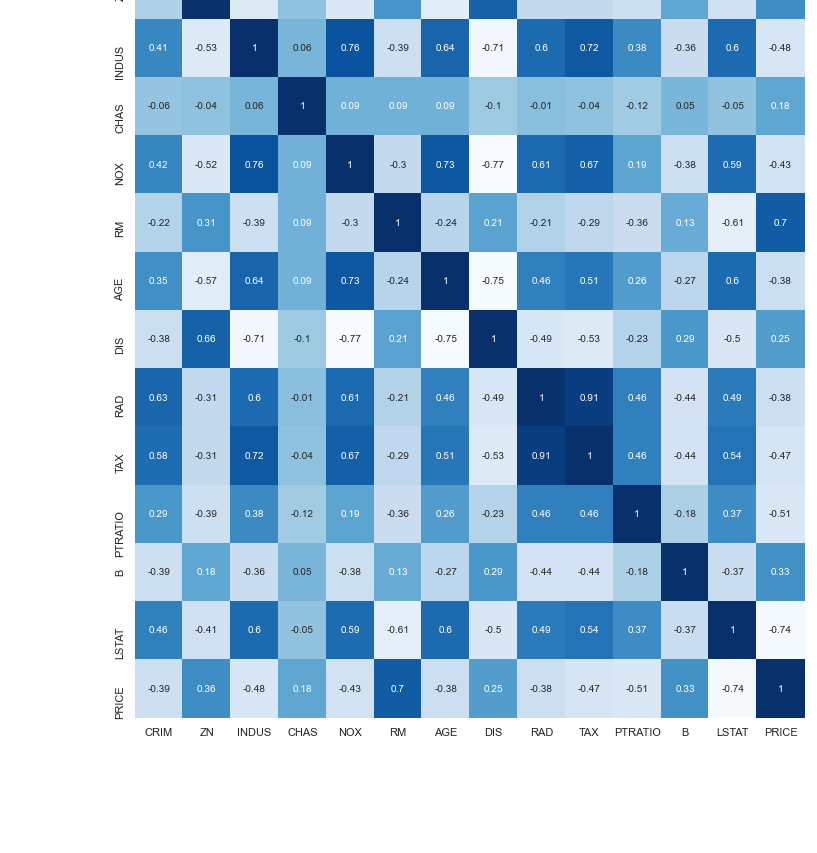

In [21]:
# Plot correlation matrix from the pd.DataFrame
corr = boston_df.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='Blues')

<a id='s2.2'></a>
## 2.2 Data Visualization (matplotlib and seaborn)

### Ex: Random Walk: [wikipedia link](https://en.wikipedia.org/wiki/Random_walk#:~:text=In%20mathematics%2C%20a%20random%20walk,space%20such%20as%20the%20integers.)

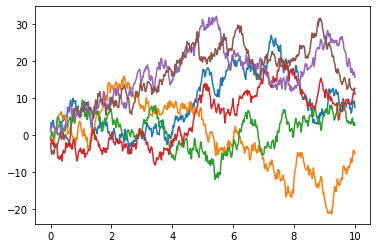

In [2]:
# Generate simple random walk plot 
rng = np.random.RandomState(1)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)

Q: What does the `np.cumsum` method do?
> Return the **cumulative sum** of the elements of a `np.ndarray` along a given axis.

Q: What does the `np.linspace` method do?
> Return a `np.ndarray` of evenly spaced numbers over a specified interval.

### Ex: 

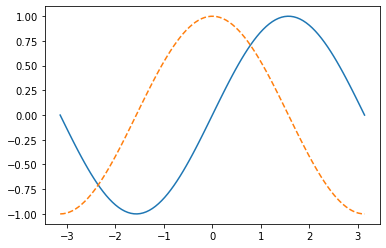

In [3]:
# plot sine and cosine graphs from -pi to pi
x = np.linspace(start=-np.pi, stop=np.pi, num=100)  
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

Q: What is the type of `plt.figure`?
- `function` | a method inside the matplotlib.pyplot module

Q: What does the `plt.figure` method do?
- Create a new figure, or activate an existing figure.

Q: The figure object generated by `plt.figure()` has what type?
- `mpl.figure.Figure`

In [4]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

Q: Save the figure to the working directory as a png.

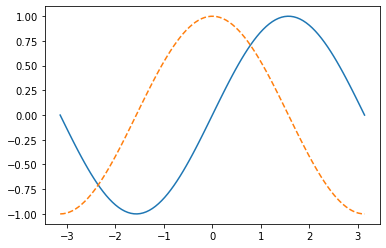

In [5]:
# plot sine and cosine graphs from -pi to pi
x = np.linspace(start=-np.pi, stop=np.pi, num=100)  
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

In [6]:
fig.savefig('trig_functions.png')

Q: Use markdown to confirm that the image, 'trig_functions.png', is saved in the working directory.
```markdown
![image info](trig_functions.png)
```

![image info](trig_functions.png)

Q: Use a Jupyter module to confirm that the image, 'trig_functions.png', is saved in the working directory.

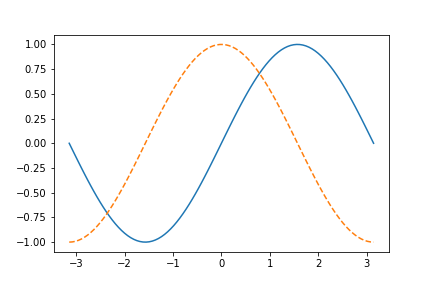

In [7]:
from IPython.display import Image
Image("trig_functions.png")

cloze: 
- In the `mpl.figure.Figure.savefig()` method, the file format is inferred from the extension of the given filename.

In [8]:
# Display supported file types for the mpl.figure.Figure.savefig() method.
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

### Ex: Creat a grid of plots with the object-oriented interface

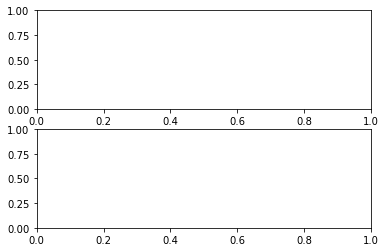

In [9]:
fig, ax = plt.subplots(2)

x = np.linspace(start=-10, stop=10, num=100)

In [10]:
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

Q: What's the type of `ax`?

AxesSubplot

matplotlib.axes._subplots.AxesSubplot

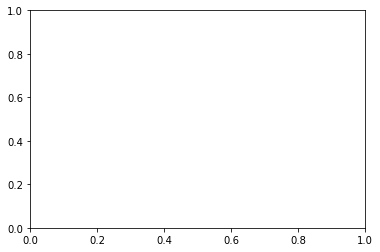

In [11]:
fig, ax = plt.subplots()
type(ax)

Q: What's the type of `fig`?

In [12]:
type(fig)

matplotlib.figure.Figure

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


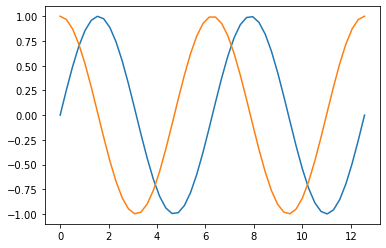

In [13]:
# simple sinusoids using figure and axes instances
fig, ax = plt.subplots()

x = np.linspace(start=0, stop=4*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
print(type(fig), type(ax))

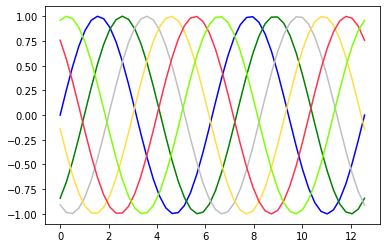

In [14]:
fig, ax = plt.subplots()
x = np.linspace(start=0, stop=4*np.pi)
# Line colors
ax.plot(x, np.sin(x - 0), color='blue') # specify color by name
ax.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
ax.plot(x, np.sin(x - 2), color='0.75') # Grayscale between 0 and 1
ax.plot(x, np.sin(x - 3), color='#FFDD44') # Hex code (RRGGBB from 00 to FF)
ax.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
ax.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

rgbcmyk: cmyk stands for Cyan, Magenta, Yellow, blacK

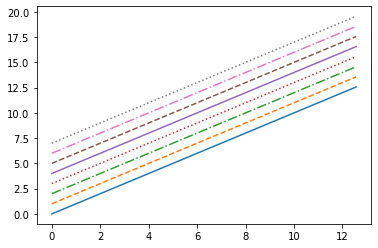

In [15]:
fig, ax = plt.subplots()
x = np.linspace(start=0, stop=4*np.pi)

# Line styles
ax.plot(x, x + 0, linestyle='solid')
ax.plot(x, x + 1, linestyle='dashed')
ax.plot(x, x + 2, linestyle='dashdot')
ax.plot(x, x + 3, linestyle='dotted');
# shorthand for line styles
ax.plot(x, x + 4, linestyle='-') # solid
ax.plot(x, x + 5, linestyle='--') # dashed
ax.plot(x, x + 6, linestyle='-.') # dashdot
ax.plot(x, x + 7, linestyle=':'); # dotted

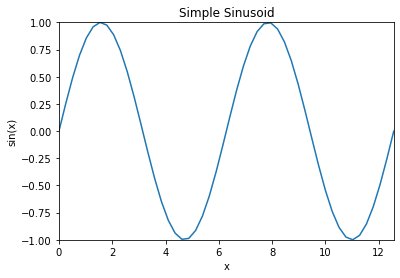

In [16]:
# Set multiple properties of an AxesSubplot with ax.set() method
x = np.linspace(start=0, stop=4*np.pi)

ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,4*np.pi), ylim=(-1, 1),
       xlabel='x', ylabel='sin(x)',
      title='Simple Sinusoid');

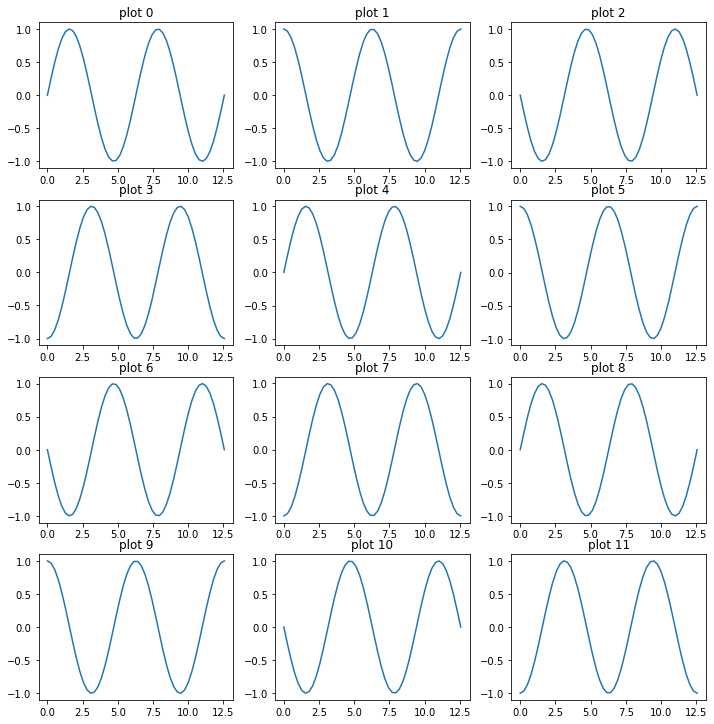

In [61]:
fig, ax_array = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.tight_layout() # prevents subplots from overlapping

count = 0
shift = 0
for row in ax_array:    
    for axes in row:
        axes.plot(x, np.sin(x + shift))
        axes.set(title='plot '+ str(count))
        count += 1
        shift += np.pi / 2


In [39]:
# currently in Section 4.2.3: Labeling Plots

----
<a id='s3'></a>
## 3. Preprocessing

- Data Cleaning
- Feature Engineering
- Data Transforms / 

### Null Values

In [ ]:
def check_null_values(df):
    """Check if there are missing values in a pd.DataFrame."""
    n_col = len(df.columns)
    null_counts = np.array(df.isnull().sum())
    if np.any(null_counts) == False:
        print("The DataFrame has no null values.")
    else:
        return df.isnull().sum()

----
<a id='s4'></a>
## 4. 

### Ex: Train-test split (random)

In [46]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
X, Y = df.iloc[:, :4], df.iloc[:, -1] # Specify feature and target matrix

# Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.3, random_state=7)

----
<a id='s5'></a>
## 5. 

----
<a id='s6'></a>
## 6. 

----
<a id='p1'></a>
# Part 1: 

----
<a id='s7'></a>
## 7. 

### Ex: Generalized argmax function for an np.ndarray

In [ ]:
def get_index_n_highest(a, n):
    """
    Arguments:
        a (np.ndarray, 1D): input vector
        n (int): how many of the highest indices you want
    
    Returns:
        highest_indices (np.ndarray): array containing the inidices of 
            the n highest elements
            
    Examples:
    --------
    Return the indices of the rows containing the 6 highest values in 
    the last column of A, a 2x2 matrix.
    
    >>> import numpy as np
    >>> import copy
    >>> rng = np.random.RandomState(7)
    >>> A = rng.randint(low=1, high=100, size=(25,25))
    >>> last_col = A[:,-1].copy()
    
    >>> get_index_n_highest(last_col, 6)
    array([12  8 23 13 21 20])
    >>> last_col[highest_indices]
    array([92, 90, 88, 85, 83, 77])
    """
    
    highest_indices = a.argsort()[-n:][::-1]
    return highest_indices

----
Teleport to [Table of Contents](#TOC)